In [8]:
import numpy as np
import scanpy as sc
import scprep
import matplotlib.pyplot as plt
import phate
import pandas as pd

In [2]:
adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')

In [3]:
adata.obs.columns

Index(['n_counts', 'batch', 'day', 'new', 'sample_id', 'growth', 'log_growth',
       'sample_labels', 'louvain', 'S_score', 'G2M_score', 'phase',
       'emt_scores'],
      dtype='object')

In [4]:
adata.obsm

AxisArrays with keys: X_pca, X_phate

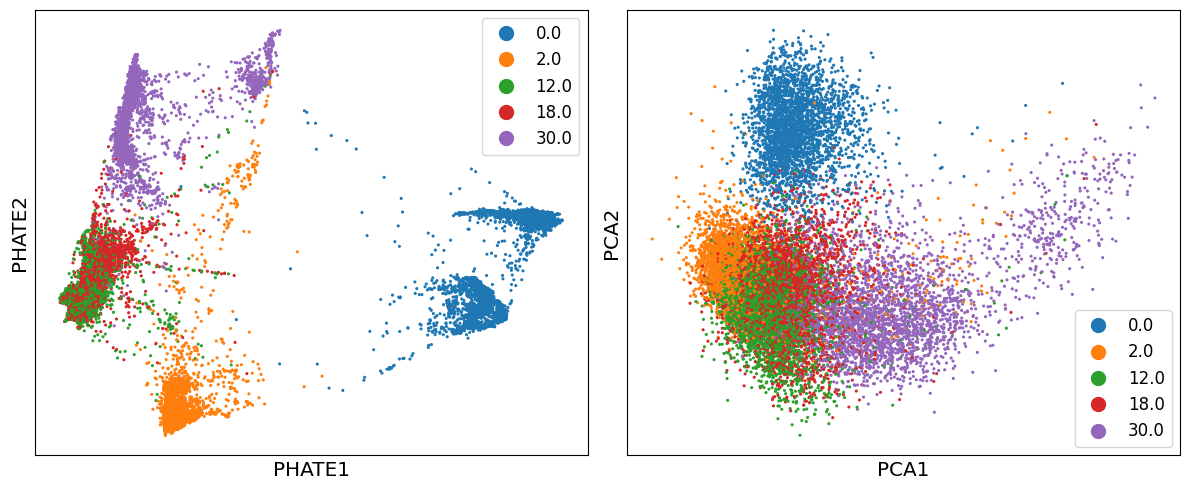

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

scprep.plot.scatter2d(adata.obsm['X_phate'], c=adata.obs['day'], ticks=False, label_prefix='PHATE', ax=ax1)
scprep.plot.scatter2d(adata.obsm['X_pca'], c=adata.obs['day'], ticks=False, label_prefix='PCA', ax=ax2)

plt.tight_layout()
plt.show()

In [6]:
phate_op = phate.PHATE(n_jobs=-1, n_components=5, random_state=42)
X_phate_5d = phate_op.fit_transform(adata.X)

Calculating PHATE...
  Running PHATE on 16985 observations and 21465 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 36.69 seconds.
    Calculating KNN search...
    Calculated KNN search in 45.47 seconds.
    Calculating affinities...
    Calculated affinities in 0.48 seconds.
  Calculated graph and diffusion operator in 82.67 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 1.31 seconds.
    Calculating KMeans...
    Calculated KMeans in 5.85 seconds.
  Calculated landmark operator in 8.30 seconds.
  Calculating optimal t...
    Automatically selected t = 24
  Calculated optimal t in 3.31 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.82 seconds.
  Calculating metric MDS...


/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


  Calculated metric MDS in 63.40 seconds.
Calculated PHATE in 158.50 seconds.


In [7]:
phate_op.set_params(n_components=10)
X_phate_10d = phate_op.transform()

Calculating metric MDS...


/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Calculated metric MDS in 184.23 seconds.


In [10]:
time_dict = {
    0.0: 0,
    2.0: 1,
    12.0: 2,
    18.0: 3,
    30.0: 4,
}
adata.obs['time'] = adata.obs['day'].map(time_dict)

In [11]:
mioflow_df = pd.DataFrame(X_phate_5d, columns=['d1', 'd2', 'd3', 'd4', 'd5'])
mioflow_df['samples'] = adata.obs['time'].values
mioflow_df.to_csv(f'../data/6-mioflow-data-5d.csv', index=False)

# subsample to 1000 cells
df = mioflow_df.sample(n=1000, random_state=42)
df.to_csv(f'../data/6-mioflow-data-5d-subsample.csv', index=False)

In [12]:
mioflow_df = pd.DataFrame(X_phate_10d, columns=['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10'])
mioflow_df['samples'] = adata.obs['time'].values
mioflow_df.to_csv(f'../data/6-mioflow-data-10d.csv', index=False)

# subsample to 1000 cells
df = mioflow_df.sample(n=1000, random_state=42)
df.to_csv(f'../data/6-mioflow-data-10d-subsample.csv', index=False)

In [13]:
from phate import mds
X_phate_10to2 = mds.embed_MDS(
    X_phate_10d,
    ndim=2,
    how=phate_op.mds,
    solver=phate_op.mds_solver,
    distance_metric=phate_op.mds_dist,
    n_jobs=phate_op.n_jobs,
    seed=phate_op.random_state,
    verbose=max(phate_op.verbose - 1, 0),
)

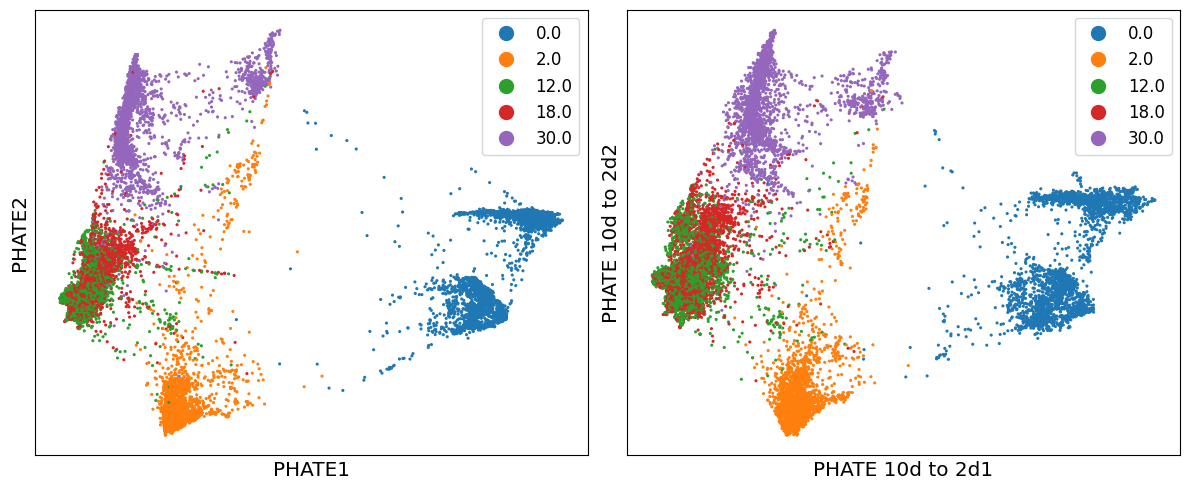

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

scprep.plot.scatter2d(adata.obsm['X_phate'], c=adata.obs['day'], ticks=False, label_prefix='PHATE', ax=ax1)
scprep.plot.scatter2d(X_phate_10to2, c=adata.obs['day'], ticks=False, label_prefix='PHATE 10d to 2d', ax=ax2)

plt.tight_layout()
plt.show()

In [15]:
from phate import mds
X_phate_5to2 = mds.embed_MDS(
    X_phate_5d,
    ndim=2,
    how=phate_op.mds,
    solver=phate_op.mds_solver,
    distance_metric=phate_op.mds_dist,
    n_jobs=phate_op.n_jobs,
    seed=phate_op.random_state,
    verbose=max(phate_op.verbose - 1, 0),
)

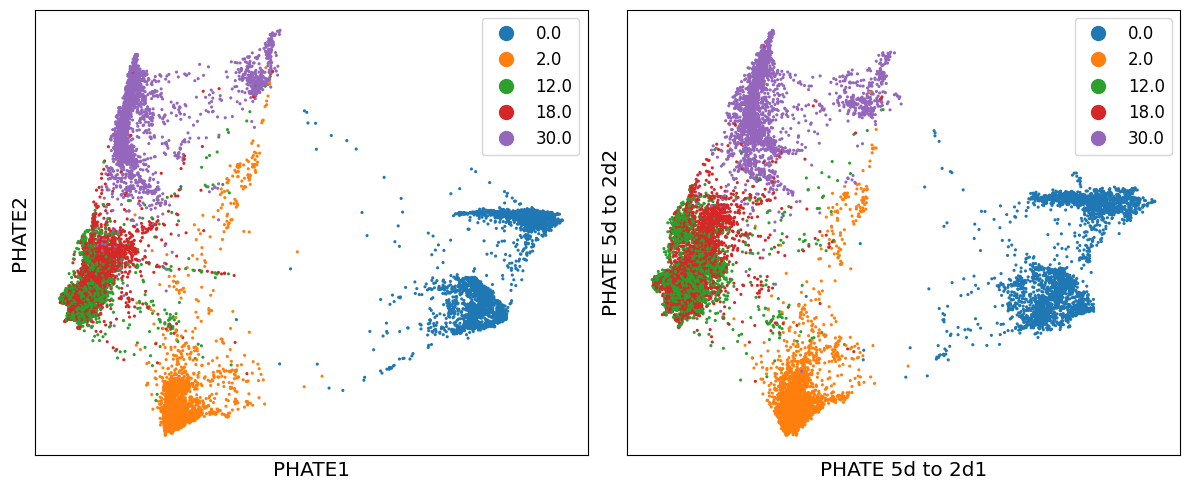

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

scprep.plot.scatter2d(adata.obsm['X_phate'], c=adata.obs['day'], ticks=False, label_prefix='PHATE', ax=ax1)
scprep.plot.scatter2d(X_phate_5to2, c=adata.obs['day'], ticks=False, label_prefix='PHATE 5d to 2d', ax=ax2)

plt.tight_layout()
plt.show()